In [1]:
#Bibliotecas utilizadas
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker

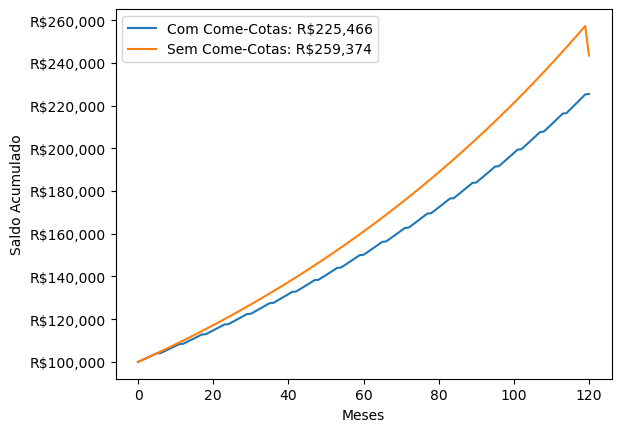

In [2]:
#Condições das aplicações
aplicacao_inicial = 100000
taxa_mes = 1.10**(1/12)-1 
num_meses = 120
come_cotas = 0.15 

#Valores Iniciais
saldo1  = aplicacao_inicial
saldo2 = aplicacao_inicial

#Dicionários que receberão os valores da simulação
tabela_padrao = [{"Mês": 0, "Saldo": saldo1}]
tabela_isenta = [{"Mês": 0, "Saldo": saldo2}]

#Simulador
for t in range(1, num_meses + 1):
      
    rendimento1 = saldo1 * taxa_mes
    saldo1 += rendimento1 
    tabela_padrao.append({"Mês": t, "Saldo": saldo1})
    
    #Condicional para saber quando aplicar a tributação come-cotas
    if t%6 == 0:
        tributacao1 = 0
        rendimento_semestral = tabela_padrao[t]["Saldo"] - tabela_padrao[t-6]["Saldo"]
        tributacao1 = rendimento_semestral * come_cotas
        tabela_padrao[t]["Saldo"] = tabela_padrao[t]["Saldo"] - tributacao1
        saldo1 -= tributacao1
        
for t in range(1, num_meses + 1):
    
    rendimento2 = saldo2 * taxa_mes
    saldo2 += rendimento2
    tabela_isenta.append({"Mês": t, "Saldo": saldo2})
    
#Criação dos Dataframes
padrao = pd.DataFrame(tabela_padrao)
padrao.set_index("Mês", inplace=True)

isento = pd.DataFrame(tabela_isenta)
isento.set_index("Mês", inplace=True)

#Resgate no 120º mês ~ alíquida regressiva de 10%
isento["Saldo"].iloc[-1] = (isento["Saldo"].iloc[-1]-isento["Saldo"].iloc[0])*0.90 + aplicacao_inicial

#Valores utilizados na legenda
saldo_final1 = tabela_padrao[120]['Saldo']
saldo_final2 = tabela_isenta[120]['Saldo']

plt.plot(padrao)
plt.plot(isento)
plt.title('')
plt.xlabel('Meses')
plt.ylabel('Saldo Acumulado')
plt.title('')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('R${x:,.0f}'))
plt.legend([f'Com Come-Cotas: R${saldo_final1:,.0f}', f'Sem Come-Cotas: R${saldo_final2:,.0f}'])